In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Attrition_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Preprocessing
# Checking Missing Value 

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# Attrition Rate
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

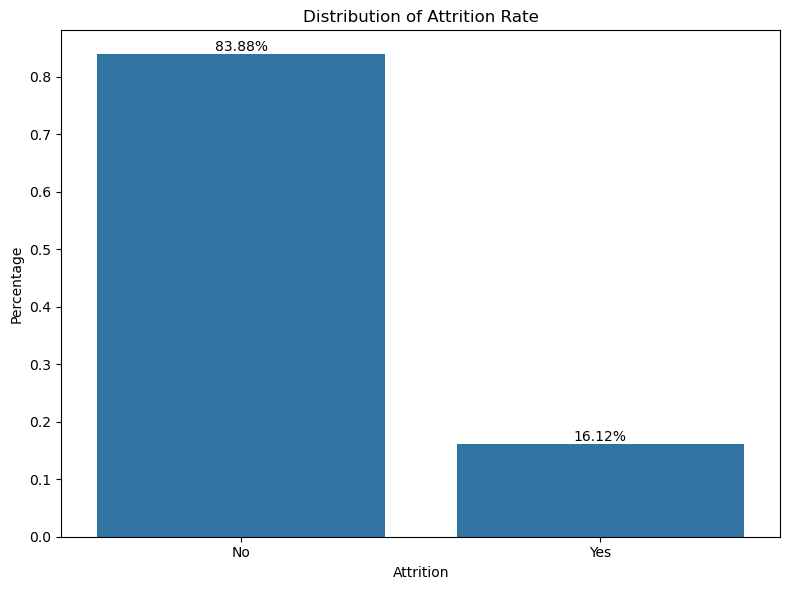

In [8]:
attrition = df['Attrition'].value_counts(normalize=True)
plt.figure(figsize=(8,6))
ax = sns.barplot(x=attrition.index, y=attrition)
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%',
    (p.get_x() + p.get_width() / 2.,
    p.get_height()),
    ha='center', va='bottom')
plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

In [9]:
# Average Tenure of Employee at Company
avg_tenure = df['YearsAtCompany'].mean()
print(f'Average years of employee to leave the company is {avg_tenure} years')

Average years of employee to leave the company is 7.0081632653061225 years


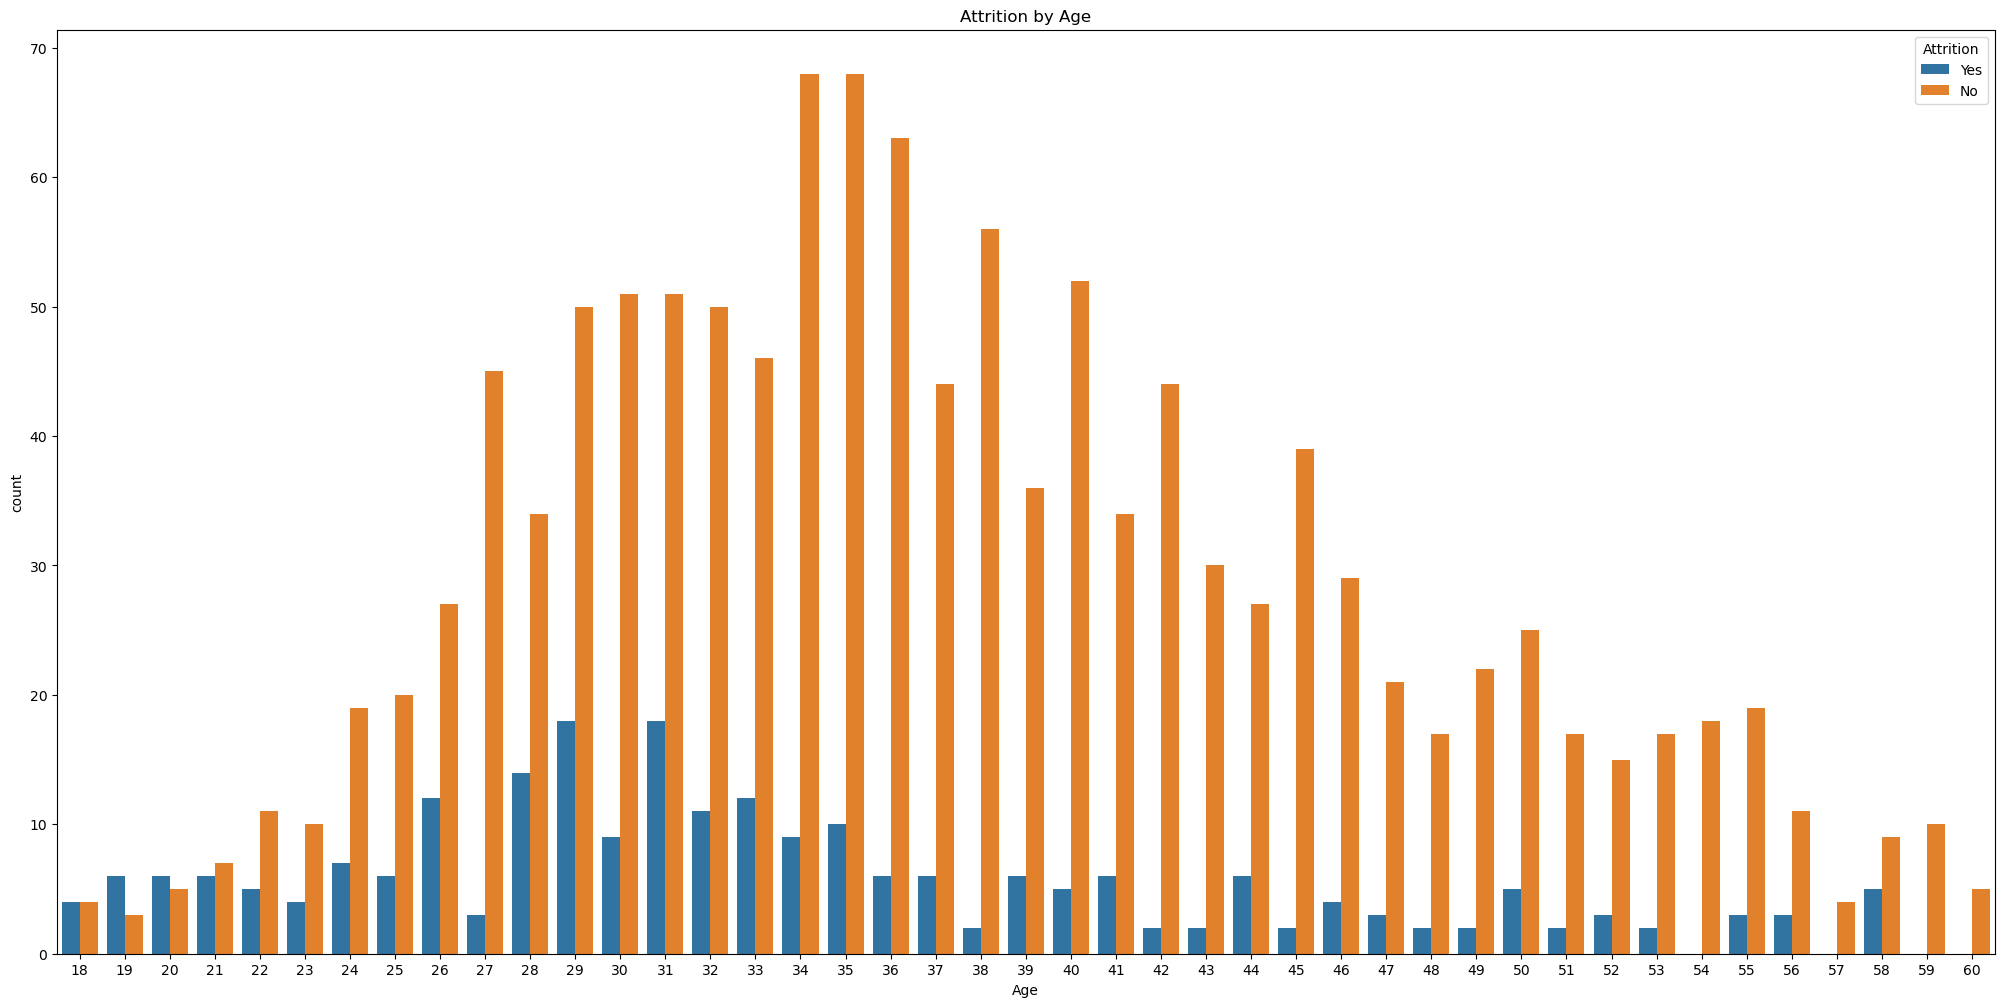

In [10]:
# Attrition by Age

plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.title("Attrition by Age")
plt.show()


<Axes: xlabel='JobLevel', ylabel='count'>

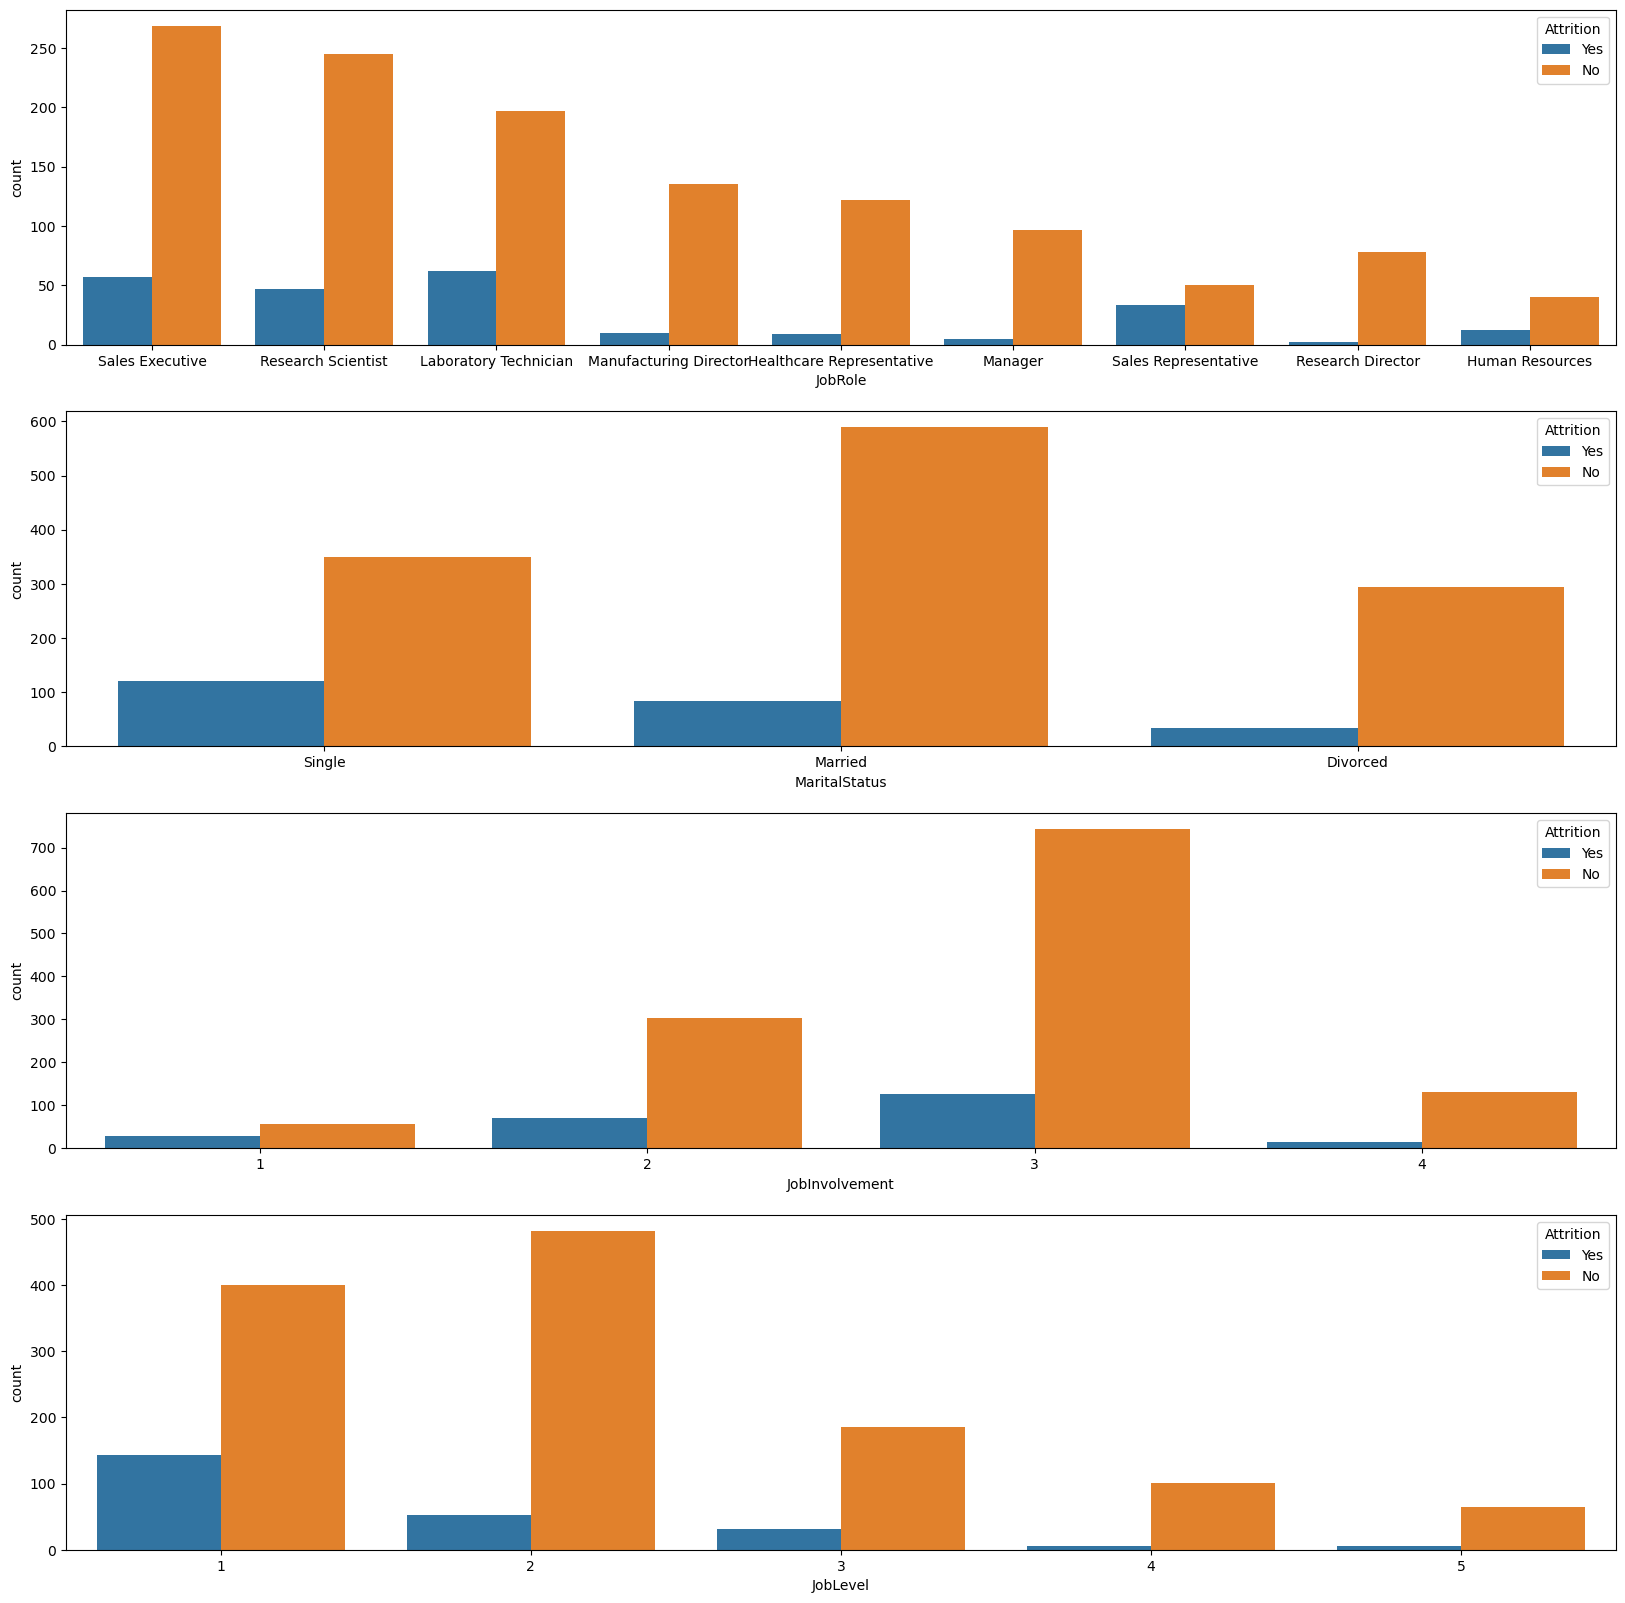

In [11]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data =df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

# Feature and Target Defination

In [12]:
X = df.drop(columns=['Attrition']) # Feature
y = df['Attrition'] # Target 0 = Stay, 1 = Leave

# Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42, stratify = y)

In [14]:
# Identify categorical and numerical columns from the training data
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

# Label Encoding

In [15]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

In [16]:
# Transform test data using the same encoders
X_test = X_test.copy()  # Avoid modifying the original test set directly
for col in categorical_cols:
    X_test[col] = label_encoders[col].transform(X_test[col])

In [17]:
# Encode the target variable (fit on training data only for consistency)
label_enc_y = LabelEncoder()
y_train = label_enc_y.fit_transform(y_train)
y_test = label_enc_y.transform(y_test)

# Model Building

# Training Logistic regression model

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_prediction = log_reg.predict(X_test_scaled)

# Traing Decision Tree Model

In [20]:
dec_tree = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dec_tree.fit(X_train, y_train)
dec_tree_prediction = dec_tree.predict(X_test)

# Model Evaluation

In [21]:
def evaluate_model(model_name,y_true, y_pred):
    print(f'\n=== {model_name} Perfomance ===')
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("\nClassification Report: ", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt = 'd', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


=== Logistic Regression Perfomance ===
Accuracy:  0.8741496598639455

Classification Report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



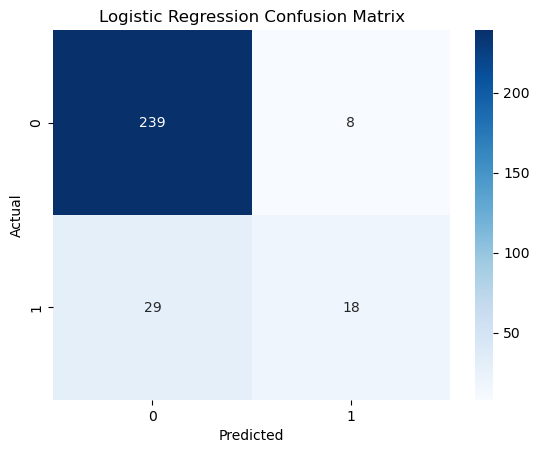

In [22]:
# Evaluation of Logistic regression Model

evaluate_model("Logistic Regression",y_test,log_reg_prediction)


=== Decision Tree Perfomance ===
Accuracy:  0.8435374149659864

Classification Report:                precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



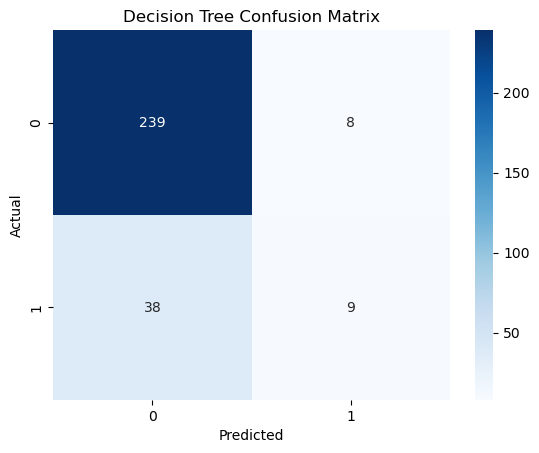

In [23]:
evaluate_model("Decision Tree", y_test, dec_tree_prediction)

Our results suggests that Logistic Regression Model outpreforms Decision Tree model
In this Particular case of predict whether an employee will leave a company based on their work-related features.

In [26]:
import joblib
import json
# Save the components for deployment
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(label_enc_y, 'label_encoder_y.pkl')  # Save target encoder for interpretation

# Save the feature order (column names in the order used during training)
with open('feature_order.json', 'w') as f:
    json.dump(list(X_train.columns), f)